In this lecture, we study how to plot high-dimenensional data. In particular, we focus on how to create 3-D plots. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.ticker import LinearLocator

%matplotlib inline

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword projection='3d' to any of the normal axes creation routines:

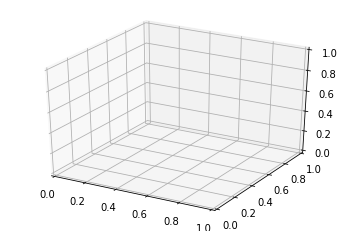

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

#### I. Points and Curves in 3-Dimensions

The most basic three-dimensional plot is a curve or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ax.plot3D() and ax.scatter3D() functions. The call signature for these is nearly identical to that of their two-dimensional counterparts.

Remember a topolotical curve in mathematics can be specified by a continuous function $\gamma$: that maps an interval $I$ of the real numbers into a topological space X. Properly speaking, the curve is the image of $\gamma$. 

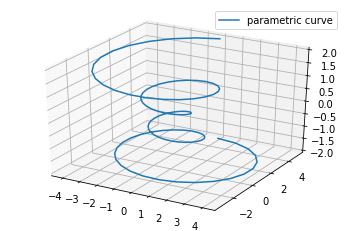

In [3]:
plt.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()
plt.show()

As another example, let's plot a trigonometric spiral, along with some points drawn randomly near the line:

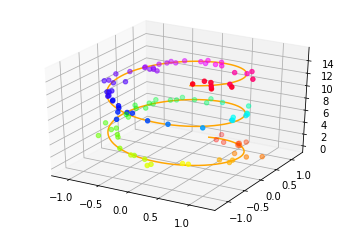

In [3]:
# Initializing 3D plots
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'orange')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='hsv')

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

We can also create 3D-scatterplots. Let's generate a fake dataset with some randomization scheme

   X          Y          Z
0  1  -7.447462  38.726450
1  2   4.676919  -3.415376
2  3   8.159612   0.599021
3  4  27.528034 -61.317745
4  5   5.781473 -26.184139


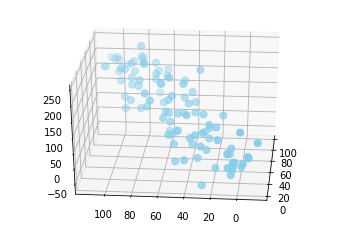

In [5]:
df=pd.DataFrame({'X': range(1,101), 'Y': np.random.randn(100)*15+range(1,101), 'Z': (np.random.randn(100)*15+range(1,101))*2 })
print(df.head(5))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='skyblue', s=50) # s controls the size of the points
ax.view_init(30, 185)
plt.show()

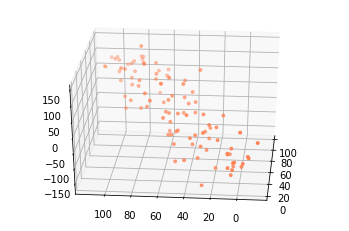

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z']-100, c='coral', s=8) # shifting the z-dimension
ax.view_init(30, 185)
plt.show()

#### II. 3D Coutour Plots

Let $z=f(x,y)$ be a two variable real-valued function. Then the curves obtained by the intersections of the planes $z=k$, where $k$ is a real number, with the graph of the function are called the **level curves** of $f(.)$. A level curve projected onto the xy-plane is called a **contour**. The 'mplot3d' contains tools to create 3D relief plots using the same inputs. Like two-dimensional ax.contour() plots, ax.contour3D() requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a 3D contour diagram of a 3D sinusoidal function. A sinusoidal function is a function that is like a sine function in the sense that the function can be produced by shifting, stretching or compressing the sine function. Below, we graph the level curve of a function $f(x,y)=sin(x^2+y^2)$. We also employ the np.linspace() function, which generates an 'numpy.ndarray' object and returns evenly spaced numbers over a specified interval.

Text(0.5, 0, 'z')

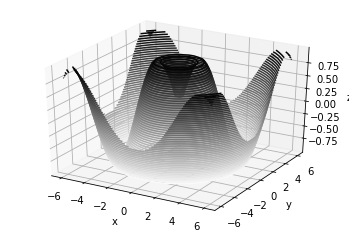

In [7]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2)) # double asterisks means power

x = np.linspace(-6, 6, 30) # drawing line space 
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y) # creating a meshgrid
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary') # binary: black and white
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis). Basically, this gives us a better view of the contour based on a better angle:

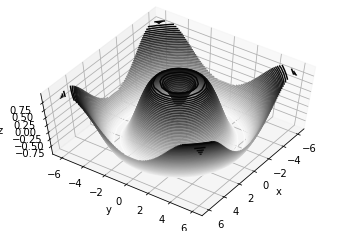

In [8]:
ax.view_init(60, 35)
fig

#### III. 3D Bar Charts

We can also create 3D bar charts with or without shades. Below is an example. The ravel() method essentially does the job of the vec() operator:

In [9]:
# creating fake data
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
print('_x:\n', _x)
print('_y:\n', _y)
print('_xx:\n',_xx)
print('_yy:\n',_yy)
print('x:\n', x)
print('y:\n', y)

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

_x:
 [0 1 2 3]
_y:
 [0 1 2 3 4]
_xx:
 [[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
_yy:
 [[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
x:
 [0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3]
y:
 [0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4]


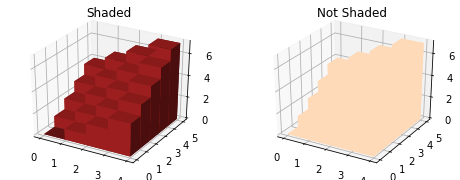

In [10]:
# setting up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.bar3d(x, y, bottom, width, depth, top, shade=True, color='firebrick')
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False, color='peachpuff') # we do not recommend this
ax2.set_title('Not Shaded')

plt.show()

#### IV. Wireframes and Surface Plots

Two other types of 3D plots that work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified 3D surface, and can make the resulting 3D forms quite easy to visualize. Here's an example of using a wireframe:

Text(0.5, 0.92, 'wireframe')

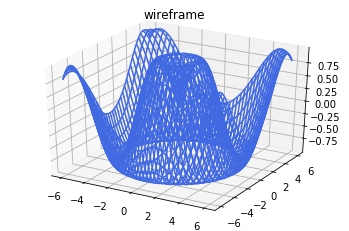

In [11]:
x = np.linspace(-6, 6, num=80) # drawing line space (returning evenly spaced numbers over a specified interval)
y = np.linspace(-6, 6, num=80) # number of samples to generate, with Default set to be 50

X, Y = np.meshgrid(x, y) # creating a meshgrid
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='royalblue')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualized:

Text(0.5, 0.92, 'surface')

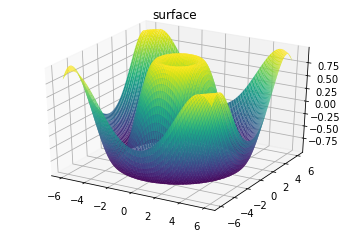

In [12]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('surface')

There are other beautififcation you can do on surface plot. For example, we can perform plotting a 3D surface colored in a checkerboard pattern:

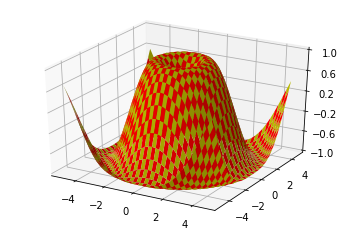

In [13]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
xlen = len(X)
ylen = len(Y)

# creating an empty array of strings with the same shape as the meshgrid
# populating it with two colors in a checkerboard pattern.
colortuple = ('yellow', 'red')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

plt.show()

References:
    - https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    - https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    - https://matplotlib.org/gallery/index.html
    - https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
    - https://stackoverflow.com/questions/51765184/how-to-3d-plot-function-of-2-variables-in-python
    - https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html
